## Stochastic Gradient Descent for Linear Regression

As described in [these lecture notes](http://cs229.stanford.edu/notes/cs229-notes1.pdf).

1. First, we generate a dataset from the linear function `f(x) = -x + 4`. We apply some noise.
2. We plot the quadratic loss for the function `f(x) = ax + b` for `a` and `b` in the [-10, 10) range.
3. We run stochastic gradient descent, using the formulal described in the paper linked above.

Enjoy!

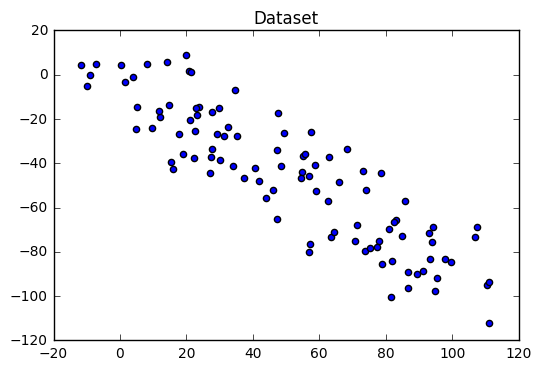

In [1]:
import random
import math
import matplotlib.pyplot as plt

random.seed(100)

N = 100
xs = []
ys = []

a = -1
b = 4

for i in range(0, N):
  x = i
  y = a * x + b
  
  scale = 40
  x += scale * (0.5 - random.random())
  y += scale * (0.5 - random.random())
  
  xs.append(x)
  ys.append(y)
  
plt.scatter(xs, ys)
plt.title('Dataset')
plt.show();
  

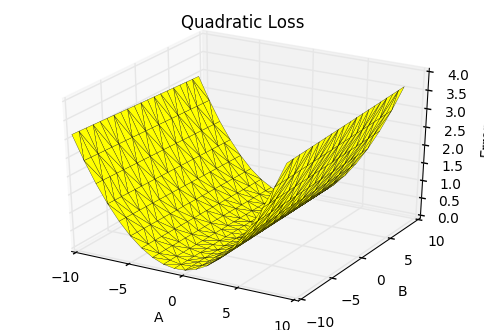

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

def calc_error(a, b):
  error = 0
  for i in range(0, N):
    predicted = a * xs[i] + b
    error += (predicted - ys[i]) ** 2
  return error

px = []
py = []
pz = []

for a in range(-10, 10):
  for b in range(-10, 10):
    px.append(a)
    py.append(b)
    pz.append(calc_error(a, b))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = colors.Normalize(vmin=-1., vmax=1.)
color = (229, 223, 52)
ax.plot_trisurf(px, py, pz, linewidth=0.2, color='yellow', shade=False)

ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Error')
plt.title('Quadratic Loss')

plt.show();

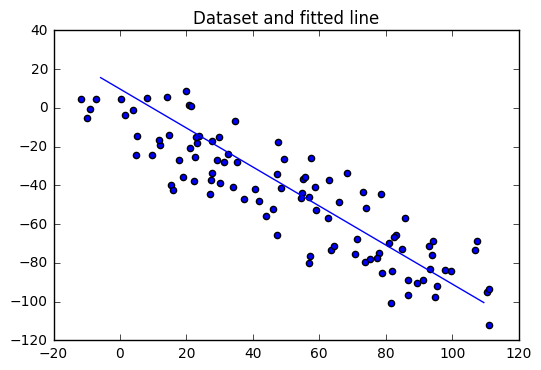

In [3]:
ta = 10
tb = 10

alpha = 0.00001

for j in range(0, 2): 
  for i in range(0, N):
    hy = ta * xs[i] + tb
    ta = ta + alpha * (ys[i] - hy) * xs[i]
    tb = tb + alpha * (ys[i] - hy) * 1.0
  
x0 = xs[0] - 20
x1 = xs[-1] + 20
y0 = ta * x0 + tb
y1 = ta * x1 + tb

plt.plot([x0, x1], [y0, y1])
  
plt.scatter(xs, ys)
plt.title('Dataset and fitted line')
plt.show();
  